## Import Libraries

In [356]:
import importlib
import os
from sklearn.model_selection import train_test_split
import pandas as pd 

try:
    importlib.reload(dataloader)
    importlib.reload(model)
    importlib.reload(analysis)
except:
    import dataloader
    import model
    import analysis

## Load Data

In [357]:
data = pd.read_csv(os.path.abspath("all_tested_molecules.csv"))

In [358]:
descriptors = dataloader.get_molecular_descriptors(data, remove_fingerprints=False)
descriptors.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.083531,13.083531,0.001173,-0.683140,0.520365,463.542,434.310,463.233188,178,0,...,0,0,0,0,1,0,0,0,0,0
1,12.170097,12.170097,0.066966,-0.066966,0.498564,378.457,360.313,378.115047,136,0,...,1,0,0,0,0,0,0,0,0,0
2,10.905837,10.905837,0.016881,-0.016881,0.382043,477.589,444.325,477.260865,184,0,...,0,0,0,0,1,0,0,0,0,0
3,11.562446,11.562446,0.270607,-0.454447,0.795948,330.609,317.505,328.981818,96,0,...,0,0,0,0,0,0,0,0,0,0
4,12.108866,12.108866,0.086947,-3.251317,0.687618,419.553,402.417,419.043204,140,0,...,0,1,0,0,0,1,0,1,0,0


In [359]:
labels = dataloader.get_labels(data)
labels.head()

,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1


## PCA Analysis

In [360]:
descriptors = analysis.ScaleDescriptors(descriptors)

In [361]:
highly_correlated_pairs = analysis.correlation(descriptors)

In [362]:
descriptors = analysis.remove_colinear(descriptors, highly_correlated_pairs)

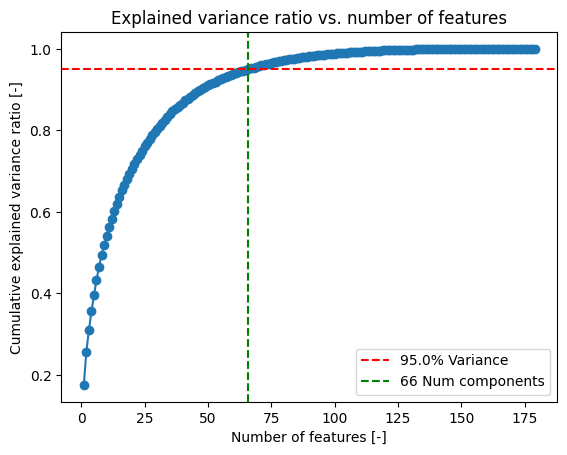

In [363]:
num_components = analysis.plot_variance(descriptors, percentage=0.95)

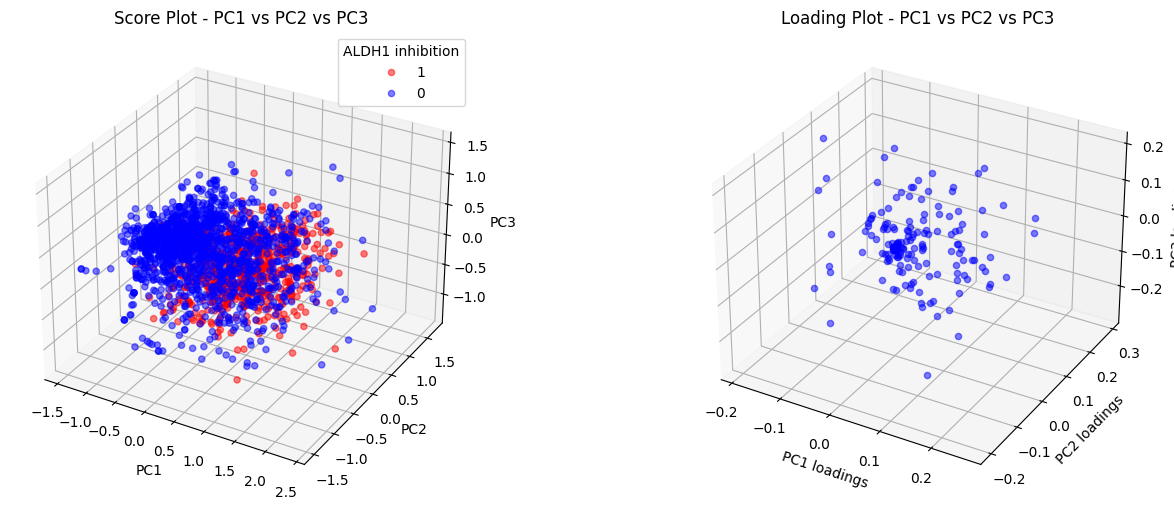

In [364]:
analysis.plot_loadings(descriptors, labels, num_components)

In [365]:
feature_rankings = analysis.feature_rankings(descriptors, num_components)
feature_rankings

fr_para_hydroxylation    0.097366
fr_Ar_NH                 0.093949
PEOE_VSA8                0.093201
EState_VSA6              0.093045
SlogP_VSA3               0.091813
                           ...   
fr_phos_ester            0.000000
fr_phos_acid             0.000000
fr_isocyan               0.000000
fr_isothiocyan           0.000000
fr_azide                 0.000000
Length: 179, dtype: float64

## PCA Selected Descriptors

In [366]:
selected_descriptors = list(feature_rankings[feature_rankings>0.07].index)
selected_descriptors

['fr_para_hydroxylation',
 'fr_Ar_NH',
 'PEOE_VSA8',
 'EState_VSA6',
 'SlogP_VSA3',
 'MaxAbsEStateIndex',
 'qed',
 'fr_imidazole',
 'fr_aryl_methyl',
 'fr_pyridine',
 'fr_furan',
 'fr_hdrzine',
 'EState_VSA5',
 'PEOE_VSA13',
 'fr_sulfide',
 'PEOE_VSA9',
 'fr_piperzine',
 'PEOE_VSA12',
 'EState_VSA7',
 'EState_VSA4',
 'BCUT2D_MRLOW',
 'EState_VSA8',
 'SMR_VSA9',
 'PEOE_VSA10',
 'fr_thiophene',
 'PEOE_VSA6',
 'fr_hdrzone',
 'fr_Ndealkylation2',
 'EState_VSA3',
 'PEOE_VSA3',
 'fr_bicyclic',
 'fr_piperdine',
 'fr_sulfonamd',
 'fr_NH1',
 'PEOE_VSA5',
 'SlogP_VSA8',
 'PEOE_VSA14',
 'PEOE_VSA11',
 'fr_methoxy',
 'fr_thiazole',
 'SlogP_VSA1',
 'MaxPartialCharge',
 'NumAliphaticHeterocycles',
 'FpDensityMorgan3',
 'FpDensityMorgan1']

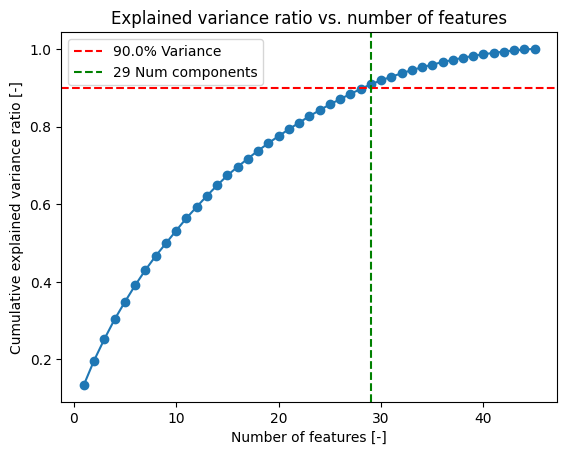

In [367]:
num_components_selected = analysis.plot_variance(descriptors[selected_descriptors], percentage=0.9)

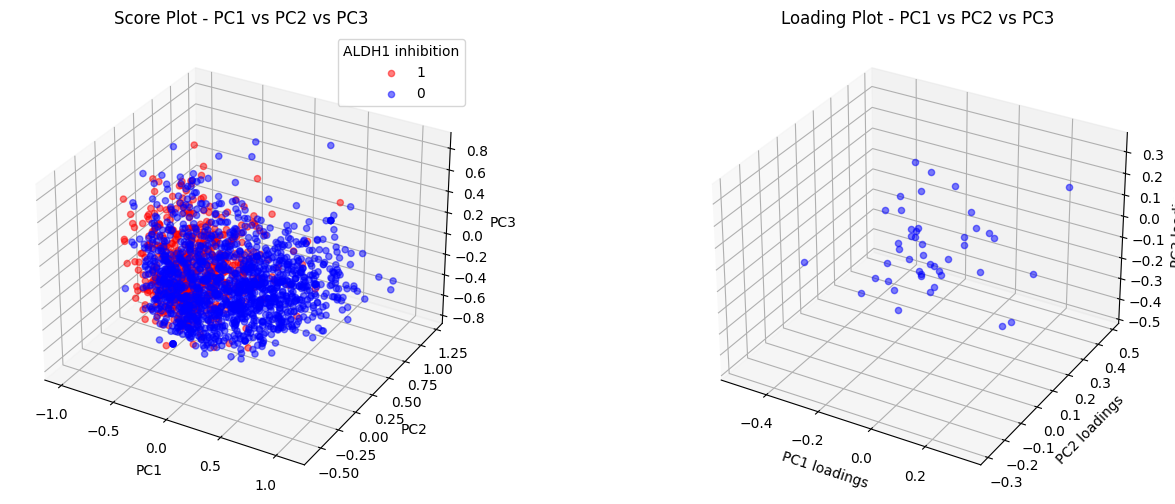

In [368]:
analysis.plot_loadings(descriptors[selected_descriptors], labels, num_components_selected)

## PCA Literature

In [369]:
literature_descriptors = []

In [370]:
num_components_literature = analysis.plot_variance(descriptors[literature_descriptors], percentage=0.9)

ValueError: at least one array or dtype is required

In [ ]:
analysis.plot_loadings(descriptors[literature_descriptors], labels, num_components_literature)

## Model training

In [371]:
#X_train, X_test, y_train, y_test = train_test_split(descriptors[selected_descriptors], labels, test_size=0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(descriptors[literature_descriptors], labels, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(descriptors, labels, test_size=0.2, random_state=0)

In [372]:
#pipeline = model.train(X_train, y_train, num_components_selected, degrees=[1,2], use_pca=[True, False])
#pipeline = model.train(X_train, y_train, num_components_literature, degrees=[1,2], use_pca=[True, False])
pipeline = model.train(X_train, y_train, num_components, degrees=[1,2], use_pca=[True, False])

Degree: 1, Use_PCA: True
Cross-validation scores: [0.74375  0.803125 0.775    0.765625 0.75    ]
Average score: 0.7675
Degree: 2, Use_PCA: True
Cross-validation scores: [0.759375 0.8      0.78125  0.765625 0.746875]
Average score: 0.7706250000000001
Degree: 1, Use_PCA: False
Cross-validation scores: [0.759375 0.803125 0.778125 0.76875  0.75625 ]
Average score: 0.7731250000000001
Degree: 2, Use_PCA: False
Cross-validation scores: [0.7875   0.796875 0.78125  0.76875  0.78125 ]
Average score: 0.7831250000000001


Test accuracy = 0.81

Test confusion_matrix


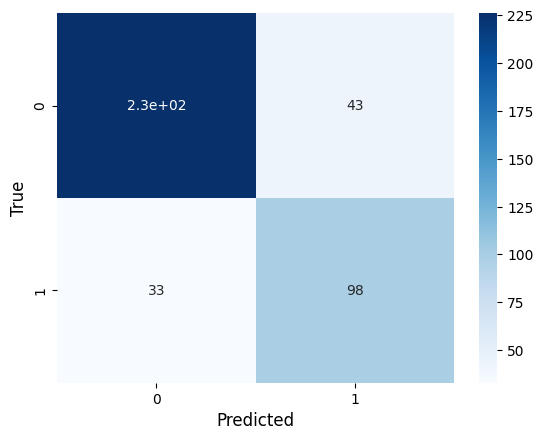

In [ ]:
accuracy = model.test(pipeline, X_test, y_test)

## Predict new molecules

In [ ]:
new_data = pd.read_csv(os.path.abspath("untested_molecules.csv"))

In [ ]:
new_descriptors = dataloader.get_molecular_descriptors(new_data, remove_fingerprints=False)
new_descriptors.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.089288,12.089288,0.112255,-0.251126,0.349176,379.504,350.272,379.225977,148,0,...,0,0,0,0,0,0,0,0,1,0
1,12.797328,12.797328,0.238255,-3.572690,0.664725,442.537,416.329,442.156243,164,0,...,0,1,0,0,0,0,0,0,0,0
2,12.973159,12.973159,0.116476,-0.893827,0.499889,359.313,345.201,359.091749,134,0,...,0,0,0,0,0,0,0,0,0,0
3,11.709157,11.709157,0.004405,-0.628881,0.247581,358.374,338.214,358.139747,136,0,...,0,0,0,0,0,0,0,0,0,0
4,12.580327,12.580327,0.039856,-4.469682,0.376568,334.729,320.617,334.080823,120,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_descriptors = analysis.remove_colinear(new_descriptors, highly_correlated_pairs)

In [ ]:
new_labels = dataloader.get_labels(new_data)
new_labels.head()

,SMILES
0,CCCCC/C(=N\NC(=O)CCC(=O)NCc1ccccc1)c1ccccc1
1,Cc1ccc(S(=O)(=O)N2CCC(C(=O)OCC(=O)N3CCc4ccccc4...
2,COc1ccc(N2C(=O)CC(Nc3ccc(F)cc3)C2=O)c([N+](=O)...
3,Cc1cc(C)cc(OCC(=O)O[NH+]=C(N)Cc2ccc([N+](=O)[O...
4,NNC(=O)C=C1CCN(c2ncc(C(F)(F)F)cc2Cl)CC1


In [ ]:
#new_labels = model.predict(pipeline, new_descriptors[selected_descriptors], new_labels)
#new_labels = model.predict(pipeline, new_descriptors[literature_descriptors], new_labels)
new_labels = model.predict(pipeline, new_descriptors, new_labels)

In [ ]:
new_labels.head(100)

,SMILES,ALDH1_inhibition
5024,Cc1cccc(NNC(N)=S)c1C,1.0
9575,NC(=S)NNc1cc(Cl)cc(Cl)c1,1.0
439,CC(C)Oc1ccc(C(=O)[O-])cc1,1.0
440,CCCn1c(C)cc(C=O)c1C,1.0
456,CC(C)(C)c1cc(O)ccc1O,1.0
...,...,...
6657,CCOC(=O)c1ccccc1NC(=O)C1COc2ccccc2O1,0.0
6634,COC(=O)C1=NN(C(C)=O)C2(CC(=O)N(c3cccc(C)c3)C2=...,0.0
6658,CCC(=O)Nc1cccc(NC(=O)CSc2nnnn2C2CCCC2)c1,0.0
6631,CC(C)CNC(=O)C1CC(=O)OC12CCCCC2,0.0


In [ ]:
new_labels.head(100).to_csv("predicted_molecules.csv", index=False)